In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import math
import random
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Activation, LSTM
from keras.engine import input_layer
from keras.models import Sequential
from tensorflow.keras import layers


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#발전기명, 년월일, 설비용량(MW)	01시	02시	03시	04시	05시	06시	07시	08시	09시	10시	11시	12시	13시	14시	15시	16시	17시	18시	19시	20시	21시	22시	23시	24시

dataset1 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_세종.csv', encoding='cp949')
dataset2 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_안산.csv', encoding='cp949')
dataset3 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_영암.csv', encoding='cp949')

dataset1.head()

,발전기명,년월일,설비용량(MW),1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,세종시폐기물매립장태양광,2017-01-01,1.628,0,0,0,0,0,0,0,...,742080,334440,87240,2880,4320,0,0,0,0,0
1,세종시폐기물매립장태양광,2017-01-02,1.628,0,0,0,0,0,0,0,...,606360,501120,158280,2760,3360,0,0,0,0,0
2,세종시폐기물매립장태양광,2017-01-03,1.628,0,0,0,0,0,0,0,...,881040,557040,128640,2280,3000,0,0,0,0,0
3,세종시폐기물매립장태양광,2017-01-04,1.628,0,0,0,0,0,0,0,...,677280,502320,112080,1800,2760,0,0,0,0,0
4,세종시폐기물매립장태양광,2017-01-05,1.628,0,0,0,0,0,0,0,...,259560,138840,45000,2520,2880,0,0,0,0,0


### * nan 값 0으로 대체

In [3]:
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("Before : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)

dataset1, dataset2, dataset3 = dataset1.fillna(0), dataset2.fillna(0), dataset3.fillna(0)
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("After : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)


Before :  0 0 0
After :  0 0 0


In [4]:
new_dataset1, new_dataset2, new_dataset3 = [], [], []

for i in range(len(dataset1)):
    new_dataset1.extend(dataset1.iloc[i,3:])

for i in range(len(dataset2)):
    new_dataset2.extend(dataset2.iloc[i,3:])

for i in range(len(dataset3)):
    new_dataset3.extend(dataset3.iloc[i,3:])
    
len(new_dataset1), len(new_dataset2), len(new_dataset3)

(40608, 40608, 40608)

In [5]:
df = pd.DataFrame({'local1':new_dataset1,
                   'local2':new_dataset2,
                   'local3':new_dataset3})


train_dataset = df.sample(frac=0.857,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
#train_stats.pop("local3")
train_stats = train_stats.transpose()

#레이블
train_labels = train_dataset['local2']
test_labels = test_dataset['local2']

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data = np.array(normed_train_data)
normed_test_data = np.array(normed_test_data)

normed_train_data = np.reshape(normed_train_data, (normed_train_data.shape[0], 1, normed_train_data.shape[1]))
normed_test_data = np.reshape(normed_test_data, (normed_test_data.shape[0], 1, normed_test_data.shape[1]))

In [6]:
def build_model():
    model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(1,len(train_dataset.keys()))),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',  optimizer='adam', metrics=['mae', 'mse'])
    return model

In [7]:
model = build_model()

In [8]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1) #bactch_size

Epoch 1/1000
870/870 [==============================] - 10s 4ms/step - loss: 90581893120.0000 - mae: 147055.5938 - mse: 90581893120.0000 - val_loss: 8981025792.0000 - val_mae: 50599.6875 - val_mse: 8981025792.0000
Epoch 2/1000
870/870 [==============================] - 3s 3ms/step - loss: 6230060032.0000 - mae: 44883.9219 - mse: 6230060032.0000 - val_loss: 4156250368.0000 - val_mae: 38715.3633 - val_mse: 4156250368.0000
Epoch 3/1000
870/870 [==============================] - 3s 3ms/step - loss: 1832782080.0000 - mae: 26215.4434 - mse: 1832782080.0000 - val_loss: 487270688.0000 - val_mae: 14970.0498 - val_mse: 487270688.0000
Epoch 4/1000
870/870 [==============================] - 3s 3ms/step - loss: 245439424.0000 - mae: 10283.9287 - mse: 245439424.0000 - val_loss: 149282544.0000 - val_mae: 7407.8374 - val_mse: 149282544.0000
Epoch 5/1000
870/870 [==============================] - 3s 3ms/step - loss: 99292624.0000 - mae: 5839.6255 - mse: 99292624.0000 - val_loss: 84408736.0000 - val_mae

870/870 [==============================] - 2s 2ms/step - loss: 30804.7051 - mae: 96.5170 - mse: 30804.7051 - val_loss: 16926.4961 - val_mae: 53.5914 - val_mse: 16926.4961
Epoch 44/1000
870/870 [==============================] - 2s 2ms/step - loss: 31739.5488 - mae: 96.2714 - mse: 31739.5488 - val_loss: 25222.3984 - val_mae: 107.1445 - val_mse: 25222.3984
Epoch 45/1000
870/870 [==============================] - 2s 2ms/step - loss: 24745.8672 - mae: 87.2902 - mse: 24745.8672 - val_loss: 22928.0215 - val_mae: 85.4576 - val_mse: 22928.0215
Epoch 46/1000
870/870 [==============================] - 2s 2ms/step - loss: 22219.2031 - mae: 85.5743 - mse: 22219.2031 - val_loss: 22559.6504 - val_mae: 74.8352 - val_mse: 22559.6504
Epoch 47/1000
870/870 [==============================] - 2s 2ms/step - loss: 41920.9297 - mae: 105.6461 - mse: 41920.9297 - val_loss: 86353.5547 - val_mae: 178.3953 - val_mse: 86353.5547
Epoch 48/1000
870/870 [==============================] - 2s 2ms/step - loss: 29803.765

870/870 [==============================] - 2s 3ms/step - loss: 16593.6680 - mae: 74.9400 - mse: 16593.6680 - val_loss: 6591.5093 - val_mae: 40.7946 - val_mse: 6591.5093
Epoch 88/1000
870/870 [==============================] - 2s 2ms/step - loss: 24282.8145 - mae: 67.4767 - mse: 24282.8145 - val_loss: 6845.5825 - val_mae: 44.4558 - val_mse: 6845.5825
Epoch 89/1000
870/870 [==============================] - 2s 2ms/step - loss: 13672.1416 - mae: 63.4688 - mse: 13672.1416 - val_loss: 5297.2217 - val_mae: 35.6760 - val_mse: 5297.2217
Epoch 90/1000
870/870 [==============================] - 2s 2ms/step - loss: 16679.4551 - mae: 72.7693 - mse: 16679.4551 - val_loss: 6379.4292 - val_mae: 49.4357 - val_mse: 6379.4292
Epoch 91/1000
870/870 [==============================] - 2s 2ms/step - loss: 26723.1445 - mae: 82.6208 - mse: 26723.1445 - val_loss: 5756.3828 - val_mae: 44.8185 - val_mse: 5756.3828
Epoch 92/1000
870/870 [==============================] - 2s 2ms/step - loss: 23533.2422 - mae: 71.5

870/870 [==============================] - 2s 2ms/step - loss: 8243.0859 - mae: 53.4159 - mse: 8243.0859 - val_loss: 6071.0508 - val_mae: 48.8753 - val_mse: 6071.0508
Epoch 132/1000
870/870 [==============================] - 2s 2ms/step - loss: 36028.2422 - mae: 76.4529 - mse: 36028.2422 - val_loss: 3934.0474 - val_mae: 43.5526 - val_mse: 3934.0474
Epoch 133/1000
870/870 [==============================] - 1s 2ms/step - loss: 18222.6328 - mae: 62.1216 - mse: 18222.6328 - val_loss: 3310.4158 - val_mae: 33.5125 - val_mse: 3310.4158
Epoch 134/1000
870/870 [==============================] - 2s 2ms/step - loss: 65721.9297 - mae: 89.7449 - mse: 65721.9297 - val_loss: 3308.3672 - val_mae: 28.3479 - val_mse: 3308.3672
Epoch 135/1000
870/870 [==============================] - 2s 2ms/step - loss: 4510.8354 - mae: 41.1431 - mse: 4510.8354 - val_loss: 5097.4692 - val_mae: 41.0812 - val_mse: 5097.4692
Epoch 136/1000
870/870 [==============================] - 2s 2ms/step - loss: 8262.7539 - mae: 53.6

Epoch 176/1000
870/870 [==============================] - 2s 2ms/step - loss: 77851.2031 - mae: 88.9934 - mse: 77851.2031 - val_loss: 2775.4709 - val_mae: 26.0206 - val_mse: 2775.4709
Epoch 177/1000
870/870 [==============================] - 2s 2ms/step - loss: 3120.7146 - mae: 35.1691 - mse: 3120.7146 - val_loss: 4831.9229 - val_mae: 51.8571 - val_mse: 4831.9229
Epoch 178/1000
870/870 [==============================] - 2s 2ms/step - loss: 3442.5481 - mae: 37.3886 - mse: 3442.5481 - val_loss: 6672.0430 - val_mae: 45.5575 - val_mse: 6672.0430
Epoch 179/1000
870/870 [==============================] - 2s 2ms/step - loss: 27863.0898 - mae: 71.0378 - mse: 27863.0898 - val_loss: 2859.8560 - val_mae: 26.4257 - val_mse: 2859.8560
Epoch 180/1000
870/870 [==============================] - 2s 2ms/step - loss: 30685.0879 - mae: 67.8137 - mse: 30685.0879 - val_loss: 3085.2820 - val_mae: 26.6547 - val_mse: 3085.2820
Epoch 181/1000
870/870 [==============================] - 1s 2ms/step - loss: 4646.8

870/870 [==============================] - 2s 2ms/step - loss: 2748.5669 - mae: 32.7470 - mse: 2748.5669 - val_loss: 3445.4966 - val_mae: 44.9412 - val_mse: 3445.4966
Epoch 221/1000
870/870 [==============================] - 2s 2ms/step - loss: 19298.1250 - mae: 52.4179 - mse: 19298.1250 - val_loss: 3295.3271 - val_mae: 39.6077 - val_mse: 3295.3271
Epoch 222/1000
870/870 [==============================] - 2s 2ms/step - loss: 10123.2539 - mae: 51.4036 - mse: 10123.2539 - val_loss: 17215.5742 - val_mae: 88.2867 - val_mse: 17215.5742
Epoch 223/1000
870/870 [==============================] - 2s 2ms/step - loss: 17212.3555 - mae: 59.0363 - mse: 17212.3555 - val_loss: 3081.6528 - val_mae: 37.9145 - val_mse: 3081.6528
Epoch 224/1000
870/870 [==============================] - 2s 2ms/step - loss: 24113.0215 - mae: 59.7549 - mse: 24113.0215 - val_loss: 2594.4404 - val_mae: 35.0954 - val_mse: 2594.4404
Epoch 225/1000
870/870 [==============================] - 2s 2ms/step - loss: 2819.9353 - mae: 

Epoch 265/1000
870/870 [==============================] - 2s 2ms/step - loss: 8536.1875 - mae: 49.3601 - mse: 8536.1875 - val_loss: 1774.8796 - val_mae: 24.9156 - val_mse: 1774.8796
Epoch 266/1000
870/870 [==============================] - 2s 2ms/step - loss: 41221.2148 - mae: 61.5161 - mse: 41221.2148 - val_loss: 2013.3462 - val_mae: 33.2441 - val_mse: 2013.3462
Epoch 267/1000
870/870 [==============================] - 2s 2ms/step - loss: 1779.5933 - mae: 26.5042 - mse: 1779.5933 - val_loss: 1677.1757 - val_mae: 21.9912 - val_mse: 1677.1757
Epoch 268/1000
870/870 [==============================] - 2s 2ms/step - loss: 7878.3960 - mae: 45.2824 - mse: 7878.3960 - val_loss: 1860.8693 - val_mae: 24.8232 - val_mse: 1860.8693
Epoch 269/1000
870/870 [==============================] - 2s 2ms/step - loss: 19807.1973 - mae: 58.2266 - mse: 19807.1973 - val_loss: 6708.6279 - val_mae: 51.8330 - val_mse: 6708.6279
Epoch 270/1000
870/870 [==============================] - 2s 2ms/step - loss: 4714.670

870/870 [==============================] - 2s 2ms/step - loss: 1301.6418 - mae: 22.4039 - mse: 1301.6418 - val_loss: 1642.8171 - val_mae: 21.6154 - val_mse: 1642.8171
Epoch 310/1000
870/870 [==============================] - 2s 2ms/step - loss: 2333.3516 - mae: 30.1461 - mse: 2333.3516 - val_loss: 4018.5559 - val_mae: 43.5750 - val_mse: 4018.5559
Epoch 311/1000
870/870 [==============================] - 2s 2ms/step - loss: 13187.1631 - mae: 52.9502 - mse: 13187.1631 - val_loss: 25131.5918 - val_mae: 88.3900 - val_mse: 25131.5918
Epoch 312/1000
870/870 [==============================] - 2s 2ms/step - loss: 17170.3066 - mae: 54.2410 - mse: 17170.3066 - val_loss: 1319.1155 - val_mae: 18.1781 - val_mse: 1319.1155
Epoch 313/1000
870/870 [==============================] - 2s 2ms/step - loss: 43096.2109 - mae: 65.1472 - mse: 43096.2109 - val_loss: 2322.8706 - val_mae: 34.1028 - val_mse: 2322.8706
Epoch 314/1000
870/870 [==============================] - 2s 2ms/step - loss: 1333.3806 - mae: 23

Epoch 354/1000
870/870 [==============================] - 2s 2ms/step - loss: 2541.4014 - mae: 29.3496 - mse: 2541.4014 - val_loss: 3161.0337 - val_mae: 32.5711 - val_mse: 3161.0337
Epoch 355/1000
870/870 [==============================] - 2s 2ms/step - loss: 43912.6992 - mae: 85.9277 - mse: 43912.6992 - val_loss: 2133.7239 - val_mae: 26.7310 - val_mse: 2133.7239
Epoch 356/1000
870/870 [==============================] - 2s 2ms/step - loss: 1354.8323 - mae: 22.7353 - mse: 1354.8323 - val_loss: 1459.0663 - val_mae: 24.1012 - val_mse: 1459.0663
Epoch 357/1000
870/870 [==============================] - 2s 2ms/step - loss: 7146.5923 - mae: 42.1494 - mse: 7146.5923 - val_loss: 1768.5339 - val_mae: 28.1819 - val_mse: 1768.5339
Epoch 358/1000
870/870 [==============================] - 2s 2ms/step - loss: 9247.1484 - mae: 47.0843 - mse: 9247.1484 - val_loss: 4398.8604 - val_mae: 38.8510 - val_mse: 4398.8604
Epoch 359/1000
870/870 [==============================] - 2s 2ms/step - loss: 12150.6650

Epoch 399/1000
870/870 [==============================] - 1s 2ms/step - loss: 18535.9531 - mae: 59.7629 - mse: 18535.9531 - val_loss: 2335.0254 - val_mae: 23.9448 - val_mse: 2335.0254
Epoch 400/1000
870/870 [==============================] - 2s 2ms/step - loss: 17894.2910 - mae: 52.5317 - mse: 17894.2910 - val_loss: 13320.7139 - val_mae: 68.0357 - val_mse: 13320.7139
Epoch 401/1000
870/870 [==============================] - 2s 2ms/step - loss: 5581.0889 - mae: 35.9558 - mse: 5581.0889 - val_loss: 2610.1050 - val_mae: 32.1111 - val_mse: 2610.1050
Epoch 402/1000
870/870 [==============================] - 2s 2ms/step - loss: 72017.2812 - mae: 84.0419 - mse: 72017.2812 - val_loss: 1381.3694 - val_mae: 19.1466 - val_mse: 1381.3694
Epoch 403/1000
870/870 [==============================] - 2s 2ms/step - loss: 869.6743 - mae: 18.2174 - mse: 869.6743 - val_loss: 1078.8962 - val_mae: 19.0941 - val_mse: 1078.8962
Epoch 404/1000
870/870 [==============================] - 2s 2ms/step - loss: 1179.0

Epoch 444/1000
870/870 [==============================] - 2s 2ms/step - loss: 1540.8351 - mae: 21.9735 - mse: 1540.8351 - val_loss: 3898.0134 - val_mae: 37.8425 - val_mse: 3898.0134
Epoch 445/1000
870/870 [==============================] - 1s 2ms/step - loss: 12506.1699 - mae: 39.2746 - mse: 12506.1699 - val_loss: 2265.3245 - val_mae: 36.1684 - val_mse: 2265.3245
Epoch 446/1000
870/870 [==============================] - 1s 2ms/step - loss: 5200.2993 - mae: 33.7796 - mse: 5200.2993 - val_loss: 1642.9155 - val_mae: 29.6484 - val_mse: 1642.9155
Epoch 447/1000
870/870 [==============================] - 2s 2ms/step - loss: 20679.8926 - mae: 55.5362 - mse: 20679.8926 - val_loss: 939.1335 - val_mae: 16.9611 - val_mse: 939.1335
Epoch 448/1000
870/870 [==============================] - 2s 2ms/step - loss: 2832.9497 - mae: 29.6374 - mse: 2832.9497 - val_loss: 2989.9084 - val_mae: 31.1139 - val_mse: 2989.9084
Epoch 449/1000
870/870 [==============================] - 2s 2ms/step - loss: 27264.2617

Epoch 489/1000
870/870 [==============================] - 2s 2ms/step - loss: 14142.7412 - mae: 49.3710 - mse: 14142.7412 - val_loss: 943.2133 - val_mae: 20.5569 - val_mse: 943.2133
Epoch 490/1000
870/870 [==============================] - 2s 2ms/step - loss: 9327.5469 - mae: 42.8366 - mse: 9327.5469 - val_loss: 1109.4467 - val_mae: 24.5118 - val_mse: 1109.4467
Epoch 491/1000
870/870 [==============================] - 2s 2ms/step - loss: 23621.4766 - mae: 54.6039 - mse: 23621.4766 - val_loss: 117836.8594 - val_mae: 184.4712 - val_mse: 117836.8594
Epoch 492/1000
870/870 [==============================] - 2s 2ms/step - loss: 3597.7595 - mae: 26.7120 - mse: 3597.7595 - val_loss: 725.5815 - val_mae: 12.5817 - val_mse: 725.5815
Epoch 493/1000
870/870 [==============================] - 2s 2ms/step - loss: 4963.2437 - mae: 36.8194 - mse: 4963.2437 - val_loss: 2282.1753 - val_mae: 26.1231 - val_mse: 2282.1753
Epoch 494/1000
870/870 [==============================] - 2s 2ms/step - loss: 14896.3

Epoch 534/1000
870/870 [==============================] - 2s 2ms/step - loss: 6617.7036 - mae: 35.8936 - mse: 6617.7036 - val_loss: 1106.9976 - val_mae: 26.8411 - val_mse: 1106.9976
Epoch 535/1000
870/870 [==============================] - 2s 2ms/step - loss: 12088.8037 - mae: 50.5982 - mse: 12088.8037 - val_loss: 511.0548 - val_mae: 10.4026 - val_mse: 511.0548
Epoch 536/1000
870/870 [==============================] - 2s 2ms/step - loss: 8197.7070 - mae: 38.2924 - mse: 8197.7070 - val_loss: 4690.6567 - val_mae: 45.0461 - val_mse: 4690.6567
Epoch 537/1000
870/870 [==============================] - 2s 2ms/step - loss: 5419.4033 - mae: 34.4128 - mse: 5419.4033 - val_loss: 9890.6152 - val_mae: 55.2576 - val_mse: 9890.6152
Epoch 538/1000
870/870 [==============================] - 2s 2ms/step - loss: 14617.3643 - mae: 48.7910 - mse: 14617.3643 - val_loss: 1574.3479 - val_mae: 21.5970 - val_mse: 1574.3479
Epoch 539/1000
870/870 [==============================] - 2s 2ms/step - loss: 29187.8027

Epoch 579/1000
870/870 [==============================] - 2s 2ms/step - loss: 69128.7109 - mae: 57.4537 - mse: 69128.7109 - val_loss: 1018.6794 - val_mae: 22.7854 - val_mse: 1018.6794
Epoch 580/1000
870/870 [==============================] - 2s 2ms/step - loss: 433.7036 - mae: 12.9967 - mse: 433.7036 - val_loss: 463.9489 - val_mae: 12.1484 - val_mse: 463.9489
Epoch 581/1000
870/870 [==============================] - 2s 2ms/step - loss: 1076.7633 - mae: 18.0083 - mse: 1076.7633 - val_loss: 598.0932 - val_mae: 14.6399 - val_mse: 598.0932
Epoch 582/1000
870/870 [==============================] - 2s 2ms/step - loss: 21941.1289 - mae: 52.8371 - mse: 21941.1289 - val_loss: 758.1490 - val_mae: 17.1209 - val_mse: 758.1490
Epoch 583/1000
870/870 [==============================] - 2s 2ms/step - loss: 1856.1196 - mae: 22.6573 - mse: 1856.1196 - val_loss: 1010.8101 - val_mae: 16.6315 - val_mse: 1010.8101
Epoch 584/1000
870/870 [==============================] - 2s 2ms/step - loss: 29577.8281 - mae

Epoch 624/1000
870/870 [==============================] - 2s 2ms/step - loss: 894.3201 - mae: 17.0773 - mse: 894.3201 - val_loss: 803.7848 - val_mae: 20.8498 - val_mse: 803.7848
Epoch 625/1000
870/870 [==============================] - 2s 2ms/step - loss: 19958.7695 - mae: 42.8510 - mse: 19958.7695 - val_loss: 579.2217 - val_mae: 13.7337 - val_mse: 579.2217
Epoch 626/1000
870/870 [==============================] - 2s 2ms/step - loss: 7435.9526 - mae: 34.0817 - mse: 7435.9526 - val_loss: 134722.6719 - val_mae: 210.1390 - val_mse: 134722.6719
Epoch 627/1000
870/870 [==============================] - 2s 2ms/step - loss: 25279.6738 - mae: 49.6138 - mse: 25279.6738 - val_loss: 1214.4995 - val_mae: 28.0659 - val_mse: 1214.4995
Epoch 628/1000
870/870 [==============================] - 2s 2ms/step - loss: 1344.8419 - mae: 20.4114 - mse: 1344.8419 - val_loss: 730.3370 - val_mae: 17.4169 - val_mse: 730.3370
Epoch 629/1000
870/870 [==============================] - 2s 2ms/step - loss: 7977.6782 -

870/870 [==============================] - 1s 1ms/step - loss: 21080.5566 - mae: 39.2736 - mse: 21080.5566 - val_loss: 12083.7256 - val_mae: 63.4494 - val_mse: 12083.7256
Epoch 670/1000
870/870 [==============================] - 1s 1ms/step - loss: 5742.6079 - mae: 30.9552 - mse: 5742.6079 - val_loss: 1193.5123 - val_mae: 21.5289 - val_mse: 1193.5123
Epoch 671/1000
870/870 [==============================] - 1s 2ms/step - loss: 17264.6660 - mae: 45.8637 - mse: 17264.6660 - val_loss: 9908.5508 - val_mae: 52.4132 - val_mse: 9908.5508
Epoch 672/1000
870/870 [==============================] - 1s 1ms/step - loss: 4722.1665 - mae: 27.3548 - mse: 4722.1665 - val_loss: 475.5725 - val_mae: 12.6172 - val_mse: 475.5725
Epoch 673/1000
870/870 [==============================] - 1s 1ms/step - loss: 14953.5127 - mae: 43.8050 - mse: 14953.5127 - val_loss: 3659.7241 - val_mae: 34.1980 - val_mse: 3659.7241
Epoch 674/1000
870/870 [==============================] - 1s 1ms/step - loss: 15443.5723 - mae: 35.

Epoch 714/1000
870/870 [==============================] - 1s 1ms/step - loss: 9607.8623 - mae: 43.6542 - mse: 9607.8623 - val_loss: 2392.7495 - val_mae: 37.0503 - val_mse: 2392.7495
Epoch 715/1000
870/870 [==============================] - 1s 1ms/step - loss: 11514.2715 - mae: 42.9270 - mse: 11514.2715 - val_loss: 9693.2988 - val_mae: 60.5534 - val_mse: 9693.2988
Epoch 716/1000
870/870 [==============================] - 1s 1ms/step - loss: 9327.1045 - mae: 42.0306 - mse: 9327.1045 - val_loss: 1055.7272 - val_mae: 20.4763 - val_mse: 1055.7272
Epoch 717/1000
870/870 [==============================] - 1s 1ms/step - loss: 2667.0859 - mae: 26.3722 - mse: 2667.0859 - val_loss: 8384.0762 - val_mae: 50.4738 - val_mse: 8384.0762
Epoch 718/1000
870/870 [==============================] - 1s 1ms/step - loss: 37026.4688 - mae: 64.0632 - mse: 37026.4688 - val_loss: 64625.6328 - val_mae: 170.8741 - val_mse: 64625.6328
Epoch 719/1000
870/870 [==============================] - 1s 1ms/step - loss: 11597

Epoch 759/1000
870/870 [==============================] - 1s 1ms/step - loss: 3746.1731 - mae: 29.3129 - mse: 3746.1731 - val_loss: 18617.5293 - val_mae: 74.1333 - val_mse: 18617.5293
Epoch 760/1000
870/870 [==============================] - 1s 1ms/step - loss: 26008.1133 - mae: 36.8739 - mse: 26008.1133 - val_loss: 373.2494 - val_mae: 11.7607 - val_mse: 373.2494
Epoch 761/1000
870/870 [==============================] - 1s 1ms/step - loss: 1634.6843 - mae: 21.4477 - mse: 1634.6843 - val_loss: 10819.0596 - val_mae: 58.8668 - val_mse: 10819.0596
Epoch 762/1000
870/870 [==============================] - 1s 1ms/step - loss: 22145.7520 - mae: 48.9337 - mse: 22145.7520 - val_loss: 859.2138 - val_mae: 16.6349 - val_mse: 859.2138
Epoch 763/1000
870/870 [==============================] - 1s 2ms/step - loss: 12800.0654 - mae: 41.3395 - mse: 12800.0654 - val_loss: 764.3550 - val_mae: 14.6942 - val_mse: 764.3550
Epoch 764/1000
870/870 [==============================] - 1s 1ms/step - loss: 2316.017

870/870 [==============================] - 1s 1ms/step - loss: 7987.9370 - mae: 37.9359 - mse: 7987.9370 - val_loss: 442.7579 - val_mae: 12.7924 - val_mse: 442.7579
Epoch 805/1000
870/870 [==============================] - 1s 1ms/step - loss: 22133.0137 - mae: 48.2415 - mse: 22133.0137 - val_loss: 2276.1904 - val_mae: 26.6351 - val_mse: 2276.1904
Epoch 806/1000
870/870 [==============================] - 1s 1ms/step - loss: 8443.7129 - mae: 29.0267 - mse: 8443.7129 - val_loss: 304369.9375 - val_mae: 336.4675 - val_mse: 304369.9375
Epoch 807/1000
870/870 [==============================] - 1s 1ms/step - loss: 6716.7954 - mae: 24.8030 - mse: 6716.7954 - val_loss: 724.7819 - val_mae: 17.6260 - val_mse: 724.7819
Epoch 808/1000
870/870 [==============================] - 1s 1ms/step - loss: 6772.9604 - mae: 37.0693 - mse: 6772.9604 - val_loss: 382.9563 - val_mae: 8.4094 - val_mse: 382.9563
Epoch 809/1000
870/870 [==============================] - 1s 1ms/step - loss: 23531.4785 - mae: 49.2917 -

870/870 [==============================] - 1s 1ms/step - loss: 258.9699 - mae: 9.7530 - mse: 258.9699 - val_loss: 372.1544 - val_mae: 11.3518 - val_mse: 372.1544
Epoch 850/1000
870/870 [==============================] - 1s 1ms/step - loss: 424.7325 - mae: 12.3468 - mse: 424.7325 - val_loss: 457.3091 - val_mae: 12.5892 - val_mse: 457.3091
Epoch 851/1000
870/870 [==============================] - 1s 1ms/step - loss: 12752.0801 - mae: 40.9455 - mse: 12752.0801 - val_loss: 724.0616 - val_mae: 14.4146 - val_mse: 724.0616
Epoch 852/1000
870/870 [==============================] - 1s 1ms/step - loss: 8598.1338 - mae: 33.4391 - mse: 8598.1338 - val_loss: 510.0897 - val_mae: 13.2553 - val_mse: 510.0897
Epoch 853/1000
870/870 [==============================] - 1s 1ms/step - loss: 19831.0996 - mae: 38.1218 - mse: 19831.0996 - val_loss: 352.4197 - val_mae: 7.5789 - val_mse: 352.4197
Epoch 854/1000
870/870 [==============================] - 1s 1ms/step - loss: 4596.9629 - mae: 27.3269 - mse: 4596.96

870/870 [==============================] - 1s 1ms/step - loss: 4236.2036 - mae: 28.2162 - mse: 4236.2036 - val_loss: 282367.0938 - val_mae: 291.1736 - val_mse: 282367.0938
Epoch 895/1000
870/870 [==============================] - 1s 1ms/step - loss: 9296.7324 - mae: 31.4253 - mse: 9296.7324 - val_loss: 877.0756 - val_mae: 16.1883 - val_mse: 877.0756
Epoch 896/1000
870/870 [==============================] - 1s 1ms/step - loss: 21387.4141 - mae: 46.8944 - mse: 21387.4141 - val_loss: 449.1106 - val_mae: 10.5170 - val_mse: 449.1106
Epoch 897/1000
870/870 [==============================] - 1s 1ms/step - loss: 12513.3164 - mae: 42.5078 - mse: 12513.3164 - val_loss: 8280.3359 - val_mae: 53.3815 - val_mse: 8280.3359
Epoch 898/1000
870/870 [==============================] - 1s 1ms/step - loss: 9029.6445 - mae: 33.6856 - mse: 9029.6445 - val_loss: 1124.0692 - val_mae: 17.9192 - val_mse: 1124.0692
Epoch 899/1000
870/870 [==============================] - 1s 1ms/step - loss: 5873.9780 - mae: 28.81

Epoch 939/1000
870/870 [==============================] - 1s 1ms/step - loss: 6114.0400 - mae: 25.8269 - mse: 6114.0400 - val_loss: 754.4747 - val_mae: 18.3087 - val_mse: 754.4747
Epoch 940/1000
870/870 [==============================] - 1s 1ms/step - loss: 7277.9067 - mae: 33.7443 - mse: 7277.9067 - val_loss: 145550.5781 - val_mae: 240.5014 - val_mse: 145550.5781
Epoch 941/1000
870/870 [==============================] - 1s 1ms/step - loss: 17778.3027 - mae: 44.8875 - mse: 17778.3027 - val_loss: 409.8470 - val_mae: 11.7411 - val_mse: 409.8470
Epoch 942/1000
870/870 [==============================] - 1s 1ms/step - loss: 2247.0061 - mae: 22.9365 - mse: 2247.0061 - val_loss: 728.1188 - val_mae: 20.3496 - val_mse: 728.1188
Epoch 943/1000
870/870 [==============================] - 1s 1ms/step - loss: 15515.3818 - mae: 39.7719 - mse: 15515.3818 - val_loss: 3475.6575 - val_mae: 35.6071 - val_mse: 3475.6575
Epoch 944/1000
870/870 [==============================] - 1s 1ms/step - loss: 8205.4189

870/870 [==============================] - 1s 1ms/step - loss: 3658.6870 - mae: 30.1782 - mse: 3658.6870 - val_loss: 879.2621 - val_mae: 19.0135 - val_mse: 879.2621
Epoch 985/1000
870/870 [==============================] - 1s 1ms/step - loss: 20434.4199 - mae: 40.7421 - mse: 20434.4199 - val_loss: 352.8703 - val_mae: 10.0647 - val_mse: 352.8703
Epoch 986/1000
870/870 [==============================] - 1s 1ms/step - loss: 9458.1348 - mae: 38.9051 - mse: 9458.1348 - val_loss: 625.8145 - val_mae: 17.1342 - val_mse: 625.8145
Epoch 987/1000
870/870 [==============================] - 1s 1ms/step - loss: 32503.7715 - mae: 48.2568 - mse: 32503.7715 - val_loss: 648.6575 - val_mae: 13.6968 - val_mse: 648.6575
Epoch 988/1000
870/870 [==============================] - 1s 1ms/step - loss: 11661.9541 - mae: 33.5793 - mse: 11661.9541 - val_loss: 4437.6372 - val_mae: 41.2361 - val_mse: 4437.6372
Epoch 989/1000
870/870 [==============================] - 1s 1ms/step - loss: 1818.3314 - mae: 19.9944 - ms

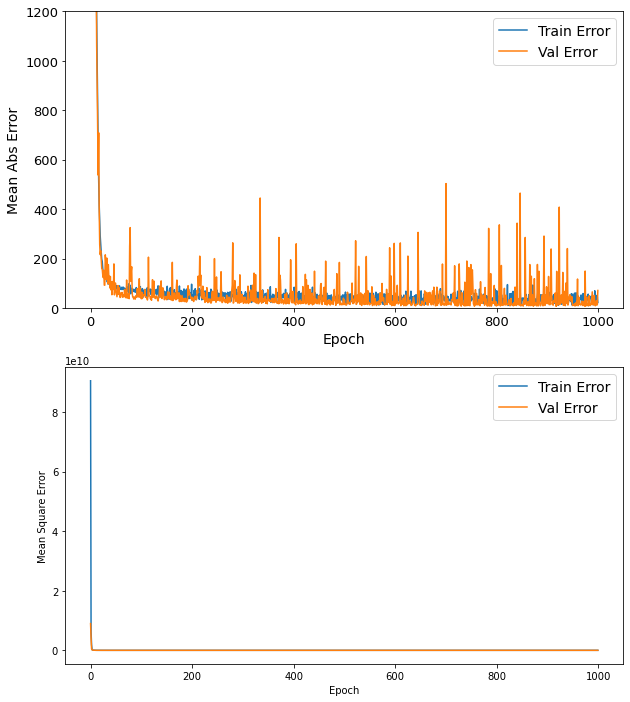

In [9]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Mean Abs Error', fontsize=14)
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,1200])
    plt.legend(fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    #plt.ylim([0,20000])
    plt.legend(fontsize=14)
    plt.show()

plot_history(history)

In [10]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} local1".format(mae))

182/182 - 0s - loss: 21523.7773 - mae: 71.9258 - mse: 21523.7773 - 145ms/epoch - 798us/step
테스트 세트의 평균 절대 오차: 71.93 local1
